# Basic Baruta Check

In [1]:
import pandas as pd
import numpy as np
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve 


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# !pip install Boruta


In [3]:
df = pd.read_csv("Covid-19_dataset.csv",header=1)


df['is_Male'] = pd.get_dummies(df['Gender'])['MALE']#one hot encoding gender so male = #1 and female = 0

df = pd.concat([df, pd.get_dummies(df['Blood_Group'])], axis=1)
# df = pd.concat([df, pd.get_dummies(df['CONTROL_blood_group'])], axis=1) # needed to remove may not be needed
df = pd.concat([df, pd.get_dummies(df['Risk_Factor'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Infection_type'])], axis=1)

blood_types = pd.get_dummies(df['Blood_Group']).columns


df = df.drop(['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type','Gender','Place_of_isolation','Patient_In','Patient_out'],axis=1)

columns = df.columns



# getting rid of blank values
print("before",len(df))
for name in columns:
    df = df[df[name] != " "]
    df = df.dropna()
    
label_Severeity = df['Severeity'] #Severeity vs Outcome
label_Outcome = df['Outcome']
df = df.drop(['Severeity','Outcome'],axis=1)

df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
columns = df.columns


print("after",len(df))

before 5668
after 5641


In [4]:
df_no_blood_data = pd.read_csv("Covid-19_dataset.csv",header=1)


df_no_blood_data['is_Male'] = pd.get_dummies(df_no_blood_data['Gender'])['MALE']#one hot encoding gender so male = #1 and female = 0

df_no_blood_data = pd.concat([df_no_blood_data, pd.get_dummies(df_no_blood_data['Risk_Factor'])], axis=1)
df_no_blood_data = pd.concat([df_no_blood_data, pd.get_dummies(df_no_blood_data['Infection_type'])], axis=1)

df_no_blood_data = df_no_blood_data.drop(['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type','Gender','Place_of_isolation','Patient_In','Patient_out'],axis=1)

columns = df_no_blood_data.columns


# getting rid of blank values
print("before",len(df_no_blood_data))
for name in columns:
    df_no_blood_data = df_no_blood_data[df_no_blood_data[name] != " "]
    df_no_blood_data = df_no_blood_data.dropna()
    
label_Severeity = df_no_blood_data['Severeity'] #Severeity vs Outcome
label_Outcome = df_no_blood_data['Outcome']
df_no_blood_data = df_no_blood_data.drop(['Severeity','Outcome'],axis=1)

df_no_blood_data = df_no_blood_data.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
columns = df_no_blood_data.columns


print("after",len(df_no_blood_data))

before 5668
after 5641


In [5]:
# df = df.reset_index()

In [6]:
df[df['Anosmia_Ageusia'] != " "]

,Age,Incubation period (days),Fever,Chills,Cough,Dyspnea,Anosmia_Ageusia,Loss_of_appetite,Asthenia,Headache,...,DMCKD,DMHT,HT,HT,NONE,RF,Asymptomatic,Asymtomatic,Symptomatic,Symtomatic
0,61.0,14,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,49.0,28,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
2,88.0,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,56.0,17,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
4,41.0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,65.0,14,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
5664,32.0,7,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
5665,28.0,4,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5666,40.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [7]:
df.dtypes

Age                          float64
 Incubation period (days)      int64
Fever                          int64
Chills                         int64
Cough                          int64
Dyspnea                        int64
Anosmia_Ageusia                int64
Loss_of_appetite               int64
Asthenia                       int64
Headache                       int64
Muscle_ache                    int64
Cyanosis                       int64
Rhinorrhea                     int64
Sore_throat                    int64
Diarrhea                       int64
Nausea_vomiting                int64
is_Male                        int64
A+                             int64
A-                             int64
AB+                            int64
AB-                            int64
B+                             int64
B-                             int64
O+                             int64
O-                             int64
AP                             int64
ARF                            int64
A

# Everything together for Severeity

In [8]:
X = df
y = label_Severeity


# let's initialize a RF model 
model = RandomForestClassifier(n_estimators=400, max_depth=5, random_state=1)

# let's initialize Boruta
feat_selector = BorutaPy(
    verbose=1,
    estimator=model,
    n_estimators='auto',
    max_iter=100  # number of iterations to perform
)

# train Boruta

feat_selector.fit(np.array(X), np.array(y))

# print support and ranking for each feature
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if not feat_selector.support_[i]:
        print("Doesn't pass the test: ", X.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])

        
        
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", X.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])


Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100
Iteration: 44 / 100
Iteration: 45 / 100
Iteration: 46 / 100


BorutaPy finished running.

Iteration: 	47 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 

# Everything together for Outcome

In [9]:
X = df
y = label_Outcome

# let's initialize a RF model 
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# let's initialize Boruta
feat_selector = BorutaPy(
    verbose=1,
    estimator=model,
    n_estimators='auto',
    max_iter=100  # number of iterations to perform
)

# train Boruta

feat_selector.fit(np.array(X), np.array(y))

# print support and ranking for each feature
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if not feat_selector.support_[i]:
        print("Doesn't pass the test: ", X.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])

        
        
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", X.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])


Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100


BorutaPy finished running.

Iteration: 	30 / 100
Confirmed: 	12
Tentative: 	0
Rejected: 	35

------Support and Ranking for each feature------
Doesn't pass the test:  Fever   - Ranking:  20
Doesn't pass the test:  Chills  - Ranking:  5
Doesn't pass the test:  Cough  - Ranking:  22
Doesn't pass the test:  Dyspnea  - Ranking:  24
Doesn't pass the test:  Anosmia_Ageusia  - Ranking:  19
Doesn't pass the test:  Loss_of_appetite  

# Comparison RandomForestClassifier Severeity

## With Blood Data

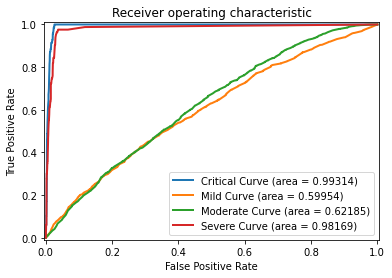

In [35]:
X = df
y = label_Severeity
np.random.seed(0)
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.9,random_state=1)
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_Train,y_Train)
predict = model.predict(X_Test)
# accuracy_score(y_Test,predict)
pred_prob = model.predict_proba(X_Test)
classes=model.classes_

avg_AUC = 0

all_auc = []


for class_index in range(len(classes)):
    labelProb = pred_prob[:,class_index]
    fpr, tpr, thresholds = metrics.roc_curve(y_Test, labelProb, pos_label=classes[class_index])

    AUC = metrics.auc(fpr, tpr)
    
    avg_AUC = avg_AUC + AUC

    
    all_auc.append([classes[class_index],fpr,tpr,AUC])

for label in all_auc:
    label_name = label[0]
    fpr = label[1]
    tpr = label[2]
    AUC = label[3]

    plt.plot(fpr, tpr, lw=2, label= str.title(label_name)+' Curve (area = %0.5f)' % AUC)
    
    plt.xlim([-0.005, 1.005])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('Receiver operating characteristic')

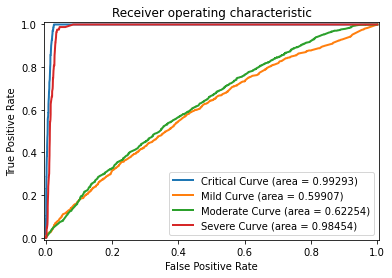

In [11]:
X = df_no_blood_data
y = label_Severeity
np.random.seed(0)
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.9,random_state=1)
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_Train,y_Train)
predict = model.predict(X_Test)
# accuracy_score(y_Test,predict)
pred_prob = model.predict_proba(X_Test)
classes=model.classes_

avg_AUC_no_blood = 0

all_auc_no_blood = []


for class_index in range(len(classes)):
    labelProb = pred_prob[:,class_index]
    fpr, tpr, thresholds = metrics.roc_curve(y_Test, labelProb, pos_label=classes[class_index])

    AUC_no_blood = metrics.auc(fpr, tpr)
    
    avg_AUC_no_blood = avg_AUC_no_blood + AUC_no_blood

    
    all_auc_no_blood.append([classes[class_index],fpr,tpr,AUC_no_blood])

for label in all_auc_no_blood:
    label_name = label[0]
    fpr = label[1]
    tpr = label[2]
    AUC = label[3]

    plt.plot(fpr, tpr, lw=2, label= str.title(label_name)+' Curve (area = %0.5f)' % AUC)
    
    plt.xlim([-0.005, 1.005])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('Receiver operating characteristic')

## Without Blood Data

In [12]:
print("No Blood - Blood: \n\n")

for nb, b in zip(all_auc_no_blood, all_auc):
    print("Diff of AUC for ",nb[0],b[0]," ",nb[3]-b[3])

print("Diff of avg AUC",avg_AUC_no_blood - avg_AUC)

No Blood - Blood: 


Diff of AUC for  Critical Critical   -0.00020542668835055178
Diff of AUC for  Mild Mild   -0.0004729261243594518
Diff of AUC for  Moderate Moderate   0.0006926548013563849
Diff of AUC for  Severe Severe   0.0028552335091267533
Diff of avg AUC 0.0028695354977732457


# Comparison RandomForestClassifier Outcome

## With Blood Data

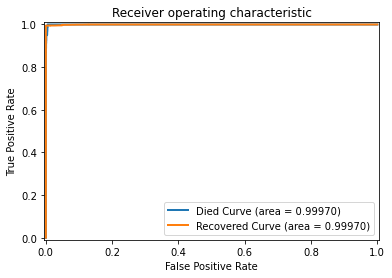

In [13]:
X = df
y = label_Outcome
np.random.seed(0)
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.9,random_state=1)
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_Train,y_Train)
predict = model.predict(X_Test)
# accuracy_score(y_Test,predict)
pred_prob = model.predict_proba(X_Test)
classes=model.classes_

avg_AUC = 0

all_auc = []


for class_index in range(len(classes)):
    labelProb = pred_prob[:,class_index]
    fpr, tpr, thresholds = metrics.roc_curve(y_Test, labelProb, pos_label=classes[class_index])

    AUC = metrics.auc(fpr, tpr)
    
    avg_AUC = avg_AUC + AUC

    
    all_auc.append([classes[class_index],fpr,tpr,AUC])

for label in all_auc:
    label_name = label[0]
    fpr = label[1]
    tpr = label[2]
    AUC = label[3]

    plt.plot(fpr, tpr, lw=2, label= str.title(label_name)+' Curve (area = %0.5f)' % AUC)
    
    plt.xlim([-0.005, 1.005])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('Receiver operating characteristic')

## Without Blood Data

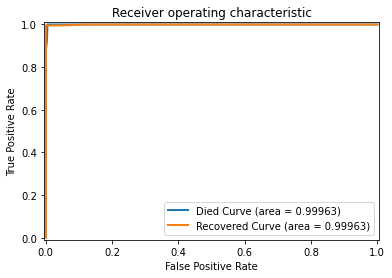

In [14]:
X = df_no_blood_data
y = label_Outcome
np.random.seed(0)
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.9,random_state=1)
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_Train,y_Train)
predict = model.predict(X_Test)
# accuracy_score(y_Test,predict)
pred_prob = model.predict_proba(X_Test)
classes=model.classes_

avg_AUC_no_blood = 0

all_auc_no_blood = []


for class_index in range(len(classes)):
    labelProb = pred_prob[:,class_index]
    fpr, tpr, thresholds = metrics.roc_curve(y_Test, labelProb, pos_label=classes[class_index])

    AUC_no_blood = metrics.auc(fpr, tpr)
    
    avg_AUC_no_blood = avg_AUC_no_blood + AUC_no_blood

    
    all_auc_no_blood.append([classes[class_index],fpr,tpr,AUC_no_blood])

for label in all_auc_no_blood:
    label_name = label[0]
    fpr = label[1]
    tpr = label[2]
    AUC = label[3]

    plt.plot(fpr, tpr, lw=2, label= str.title(label_name)+' Curve (area = %0.5f)' % AUC)
    
    plt.xlim([-0.005, 1.005])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('Receiver operating characteristic')

In [15]:
print("No Blood - Blood: \n\n")

for nb, b in zip(all_auc_no_blood, all_auc):
    print("Diff of AUC for ",nb[0],b[0]," ",nb[3]-b[3])

print("Diff of avg AUC",avg_AUC_no_blood - avg_AUC)

No Blood - Blood: 


Diff of AUC for  Died Died   -6.866571283747902e-05
Diff of AUC for  Recovered Recovered   -6.8665712837368e-05
Diff of avg AUC -0.00013733142567495804


# Comparison Logistic Regression Outcome

In [16]:
from sklearn.linear_model import LogisticRegression

## Without Blood Data

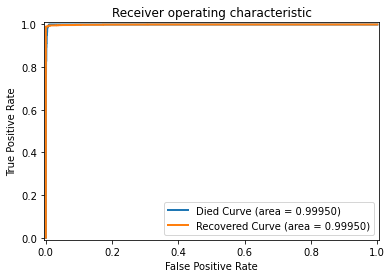

In [17]:
X = df_no_blood_data
y = label_Outcome
np.random.seed(0)
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.9,random_state=1)
model = LogisticRegression(random_state=1)
model.fit(X_Train,y_Train)
predict = model.predict(X_Test)
# accuracy_score(y_Test,predict)
pred_prob = model.predict_proba(X_Test)
classes=model.classes_

avg_AUC_no_blood = 0

all_auc_no_blood = []


for class_index in range(len(classes)):
    labelProb = pred_prob[:,class_index]
    fpr, tpr, thresholds = metrics.roc_curve(y_Test, labelProb, pos_label=classes[class_index])

    AUC_no_blood = metrics.auc(fpr, tpr)
    
    avg_AUC_no_blood = avg_AUC_no_blood + AUC_no_blood

    
    all_auc_no_blood.append([classes[class_index],fpr,tpr,AUC_no_blood])

for label in all_auc_no_blood:
    label_name = label[0]
    fpr = label[1]
    tpr = label[2]
    AUC = label[3]

    plt.plot(fpr, tpr, lw=2, label= str.title(label_name)+' Curve (area = %0.5f)' % AUC)
    
    plt.xlim([-0.005, 1.005])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('Receiver operating characteristic')

## With Blood Data

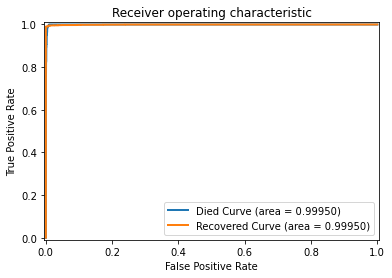

In [18]:
X = df
y = label_Outcome
np.random.seed(0)
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.9,random_state=1)
model = LogisticRegression(random_state=1)
model.fit(X_Train,y_Train)
predict = model.predict(X_Test)
# accuracy_score(y_Test,predict)
pred_prob = model.predict_proba(X_Test)
classes=model.classes_

avg_AUC = 0

all_auc = []


for class_index in range(len(classes)):
    labelProb = pred_prob[:,class_index]
    fpr, tpr, thresholds = metrics.roc_curve(y_Test, labelProb, pos_label=classes[class_index])

    AUC = metrics.auc(fpr, tpr)
    
    avg_AUC = avg_AUC + AUC

    
    all_auc.append([classes[class_index],fpr,tpr,AUC])

for label in all_auc:
    label_name = label[0]
    fpr = label[1]
    tpr = label[2]
    AUC = label[3]

    plt.plot(fpr, tpr, lw=2, label= str.title(label_name)+' Curve (area = %0.5f)' % AUC)
    
    plt.xlim([-0.005, 1.005])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('Receiver operating characteristic')

In [19]:
print("No Blood - Blood: \n\n")

for nb, b in zip(all_auc_no_blood, all_auc):
    print("Diff of AUC for ",nb[0],b[0]," ",nb[3]-b[3])

print("Diff of avg AUC",avg_AUC_no_blood - avg_AUC)

No Blood - Blood: 


Diff of AUC for  Died Died   2.4969350121972766e-06
Diff of AUC for  Recovered Recovered   2.4969350121972766e-06
Diff of avg AUC 4.993870024394553e-06


# Comparison Logistic Regression Severeity

## Without Blood Data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


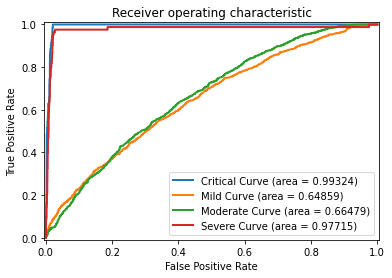

In [20]:
X = df_no_blood_data
y = label_Severeity
np.random.seed(0)
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.9,random_state=1)
model = LogisticRegression(random_state=1,max_iter=500,C=0.5)
model.fit(X_Train,y_Train)
predict = model.predict(X_Test)
# accuracy_score(y_Test,predict)
pred_prob = model.predict_proba(X_Test)
classes=model.classes_

avg_AUC_no_blood = 0

all_auc_no_blood = []


for class_index in range(len(classes)):
    labelProb = pred_prob[:,class_index]
    fpr, tpr, thresholds = metrics.roc_curve(y_Test, labelProb, pos_label=classes[class_index])

    AUC_no_blood = metrics.auc(fpr, tpr)
    
    avg_AUC_no_blood = avg_AUC_no_blood + AUC_no_blood

    
    all_auc_no_blood.append([classes[class_index],fpr,tpr,AUC_no_blood])

for label in all_auc_no_blood:
    label_name = label[0]
    fpr = label[1]
    tpr = label[2]
    AUC = label[3]

    plt.plot(fpr, tpr, lw=2, label= str.title(label_name)+' Curve (area = %0.5f)' % AUC)
    
    plt.xlim([-0.005, 1.005])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('Receiver operating characteristic')

## With Blood Data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


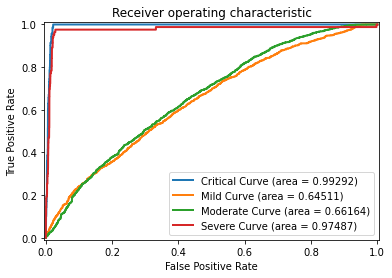

In [21]:
X = df
y = label_Severeity
np.random.seed(0)
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.9,random_state=1)
model = LogisticRegression(random_state=1,max_iter=500,C=0.1)
model.fit(X_Train,y_Train)
predict = model.predict(X_Test)
# accuracy_score(y_Test,predict)
pred_prob = model.predict_proba(X_Test)
classes=model.classes_

avg_AUC = 0

all_auc = []


for class_index in range(len(classes)):
    labelProb = pred_prob[:,class_index]
    fpr, tpr, thresholds = metrics.roc_curve(y_Test, labelProb, pos_label=classes[class_index])

    AUC = metrics.auc(fpr, tpr)
    
    avg_AUC = avg_AUC + AUC

    
    all_auc.append([classes[class_index],fpr,tpr,AUC])

for label in all_auc:
    label_name = label[0]
    fpr = label[1]
    tpr = label[2]
    AUC = label[3]

    plt.plot(fpr, tpr, lw=2, label= str.title(label_name)+' Curve (area = %0.5f)' % AUC)
    
    plt.xlim([-0.005, 1.005])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('Receiver operating characteristic')

In [22]:
print("No Blood - Blood: \n\n")

for nb, b in zip(all_auc_no_blood, all_auc):
    print("Diff of AUC for ",nb[0],b[0]," ",nb[3]-b[3])

print("Diff of avg AUC",avg_AUC_no_blood - avg_AUC)

No Blood - Blood: 


Diff of AUC for  Critical Critical   0.00031669947787382746
Diff of AUC for  Mild Mild   0.0034833249235453057
Diff of AUC for  Moderate Moderate   0.0031511598378797245
Diff of AUC for  Severe Severe   0.002279844246831142
Diff of avg AUC 0.00923102848613011


In [24]:
blood_types

Index(['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-'], dtype='object')

# Per BloodType

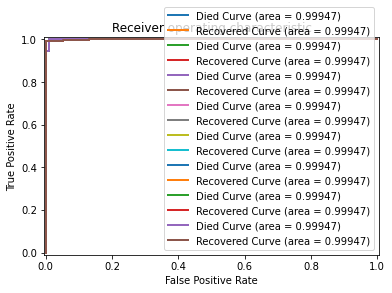

In [33]:
X = df
y = label_Outcome
np.random.seed(0)
model = LogisticRegression(random_state=1)
model.fit(X_Train,y_Train)
predict = model.predict(X_Test)
# accuracy_score(y_Test,predict)
pred_prob = model.predict_proba(X_Test)
classes=model.classes_



for bt in blood_types:
    
    avg_AUC_no_blood = 0

    all_auc_no_blood = []

    X = df[df[blood_types[0]]==1]
    y = label_Outcome[df[blood_types[0]]==1]
    X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.9,random_state=1)
    
    for class_index in range(len(classes)):
        labelProb = pred_prob[:,class_index]
        fpr, tpr, thresholds = metrics.roc_curve(y_Test, labelProb, pos_label=classes[class_index])

        AUC_no_blood = metrics.auc(fpr, tpr)

        avg_AUC_no_blood = avg_AUC_no_blood + AUC_no_blood


        all_auc_no_blood.append([classes[class_index],fpr,tpr,AUC_no_blood])

    for label in all_auc_no_blood:
        label_name = label[0]
        fpr = label[1]
        tpr = label[2]
        AUC = label[3]

        plt.plot(fpr, tpr, lw=2, label= str.title(,label_name)+' Curve (area = %0.5f)' % AUC)

        plt.xlim([-0.005, 1.005])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.title('Receiver operating characteristic')

,Age,Incubation period (days),Fever,Chills,Cough,Dyspnea,Anosmia_Ageusia,Loss_of_appetite,Asthenia,Headache,...,DMCKD,DMHT,HT,HT,NONE,RF,Asymptomatic,Asymtomatic,Symptomatic,Symtomatic
0,61.0,14,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
2,88.0,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,56.0,17,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
14,49.0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
17,34.0,10,0,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,13.0,14,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
5660,60.0,14,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
5661,49.0,14,0,0,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,1,0
5666,40.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
